In [1]:
import pandas as pd
import sqlite3
import re

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load the dataset from the CSV file
file_path = 'customer churn data_usecase2_Hackathon.csv'
df = pd.read_csv(file_path)

# Display the first few rows and the original column names
print("Original DataFrame Head:")
display(df.head())
print("\nOriginal Column Names:")
print(df.columns.tolist())

Original DataFrame Head:


,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,...,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category,Recommendation
0,5522-JBWMO,Male,0.0,No,Yes,1.0,Yes,No,general loan,No,...,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card,NaN
1,5275-PMFUT,Male,0.0,Yes,Yes,72.0,No,No,general loan,Yes,...,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account,NaN
2,5609-CEBID,Female,1.0,No,No,20.0,Yes,Yes,top up loan,No,...,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans,NaN
3,4381-MHQDC,Female,0.0,No,No,47.0,Yes,Yes,general loan,Yes,...,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very s...,Savings Account,NaN
4,6353-BRMMA,Female,0.0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,...,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complic...,Loans,NaN



Original Column Names:
['customerID', 'Gender', 'Senior Citizen', 'Marital Status', 'Dependents', 'tenure in months', 'Priority Account', 'Credit Cards', 'Loan Account', 'Netbanking', 'Debit Card', 'MobileApp', 'TechSupport Availed', 'Zero Balance Account', 'FDs', 'Interest Deposited', 'Paperless Banking', 'Monthly Average Balance (USD)', 'Yearly Average Balance (USD)', 'Churn', 'Customer Feedback', 'Category', 'Recommendation']


In [3]:
def clean_col_names(df):
    """
    Cleans column names by converting to lowercase, replacing spaces and special
    characters with underscores, and removing any trailing underscores.
    """
    cleaned_columns = []
    for col in df.columns:
        # Remove special characters
        clean_col = re.sub(r'[^a-zA-Z0-9\s]', '', col)
        # Replace spaces with underscores and convert to lowercase
        clean_col = clean_col.lower().replace(' ', '_')
        cleaned_columns.append(clean_col)
    return cleaned_columns

# Assign the cleaned column names to the DataFrame
df.columns = clean_col_names(df)

print("Cleaned Column Names:")
print(df.columns.tolist())

Cleaned Column Names:
['customerid', 'gender', 'senior_citizen', 'marital_status', 'dependents', 'tenure_in_months', 'priority_account', 'credit_cards', 'loan_account', 'netbanking', 'debit_card', 'mobileapp', 'techsupport_availed', 'zero_balance_account', 'fds', 'interest_deposited', 'paperless_banking', 'monthly_average_balance_usd', 'yearly_average_balance_usd', 'churn', 'customer_feedback', 'category', 'recommendation']


In [4]:
from sqlalchemy import create_engine

# Cell 3: Setup Database Engine and Load Data
# The connection string 'sqlite:///hcl_churn_data.db' tells SQLAlchemy to use the
# SQLite dialect and connect to a file named 'hcl_churn_data.db' in the same directory.
engine = create_engine('sqlite:///hcl_churn_data.db')
table_name = 'customers'

# Load the DataFrame into the 'customers' table.
# if_exists='replace' ensures we can re-run the script.
df.to_sql(table_name, engine, if_exists='replace', index=False)

print(f"DataFrame successfully loaded into table '{table_name}' using SQLAlchemy engine.")


DataFrame successfully loaded into table 'customers' using SQLAlchemy engine.


In [5]:
query = f"SELECT * FROM {table_name} LIMIT 5;"
verification_df = pd.read_sql_query(query, engine)

print("\nVerification: First 5 rows from the database:")
display(verification_df)


Verification: First 5 rows from the database:


,customerid,gender,senior_citizen,marital_status,dependents,tenure_in_months,priority_account,credit_cards,loan_account,netbanking,...,zero_balance_account,fds,interest_deposited,paperless_banking,monthly_average_balance_usd,yearly_average_balance_usd,churn,customer_feedback,category,recommendation
0,5522-JBWMO,Male,0.0,No,Yes,1.0,Yes,No,general loan,No,...,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card,None
1,5275-PMFUT,Male,0.0,Yes,Yes,72.0,No,No,general loan,Yes,...,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account,None
2,5609-CEBID,Female,1.0,No,No,20.0,Yes,Yes,top up loan,No,...,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans,None
3,4381-MHQDC,Female,0.0,No,No,47.0,Yes,Yes,general loan,Yes,...,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very s...,Savings Account,None
4,6353-BRMMA,Female,0.0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,...,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complic...,Loans,None


In [6]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Create the engine to connect to our database
engine = create_engine('sqlite:///hcl_churn_data.db')
table_name = 'customers'

# Load the entire 'customers' table into a DataFrame
df = pd.read_sql_table(table_name, engine)

print("Data loaded from database successfully.")
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Data loaded from database successfully.
The dataset contains 1060 rows and 23 columns.


In [7]:
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerid                   999 non-null    object 
 1   gender                       999 non-null    object 
 2   senior_citizen               999 non-null    float64
 3   marital_status               999 non-null    object 
 4   dependents                   997 non-null    object 
 5   tenure_in_months             994 non-null    float64
 6   priority_account             997 non-null    object 
 7   credit_cards                 997 non-null    object 
 8   loan_account                 998 non-null    object 
 9   netbanking                   998 non-null    object 
 10  debit_card                   999 non-null    object 
 11  mobileapp                    999 non-null    object 
 12  techsupport_availed          998 non-null    object 


In [8]:
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe())


Descriptive Statistics for Numerical Columns:


,senior_citizen,tenure_in_months,monthly_average_balance_usd,recommendation
count,999.000000,994.000000,995.000000,0.0
mean,0.163163,32.247485,66.455578,NaN
std,0.369700,24.800698,29.922493,NaN
min,0.000000,0.000000,18.950000,NaN
25%,0.000000,8.000000,42.000000,NaN
50%,0.000000,29.000000,74.250000,NaN
75%,0.000000,56.000000,90.050000,NaN
max,1.000000,72.000000,116.250000,NaN


In [9]:
# Display value counts for key categorical columns
print("Value Counts for 'gender':")
print(df['gender'].value_counts())
print("\n" + "-"*30)

print("\nValue Counts for 'marital_status':")
print(df['marital_status'].value_counts())
print("\n" + "-"*30)

print("\nValue Counts for 'category' (feedback category):")
print(df['category'].value_counts())
print("\n" + "-"*30)

print("\nValue Counts for 'churn':")
print(df['churn'].value_counts())

Value Counts for 'gender':
gender
Male      509
Female    490
Name: count, dtype: int64

------------------------------

Value Counts for 'marital_status':
marital_status
No     524
Yes    475
Name: count, dtype: int64

------------------------------

Value Counts for 'category' (feedback category):
category
Loans               193
Savings Account     122
Current Account     109
Debit Card           77
Branch Service       64
Mobile Banking       58
Credit Cards         58
ATM Service          56
Credit Card          55
General              54
Debit Cards          53
Online Banking       34
Fixed Deposit        31
Customer Support      6
Savings               1
Mobile                1
Name: count, dtype: int64

------------------------------

Value Counts for 'churn':
churn
No     732
Yes    251
Name: count, dtype: int64


C:\Users\kulad\AppData\Local\Temp\ipykernel_14308\702515062.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='viridis', order=['No', 'Yes'])


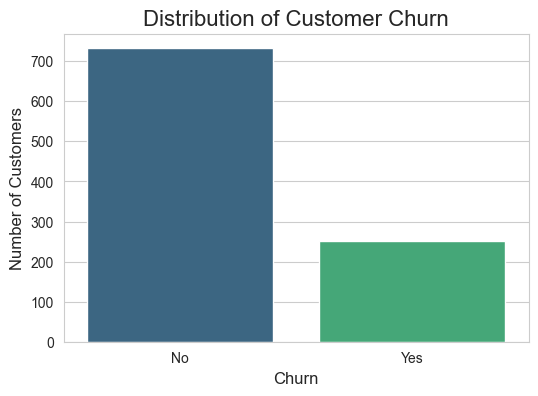

In [10]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure and axis for the plot
plt.figure(figsize=(6, 4))

# Create a count plot for the 'churn' column
sns.countplot(x='churn', data=df, palette='viridis', order=['No', 'Yes'])

# Add a title and labels
plt.title('Distribution of Customer Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Display the plot
plt.show()

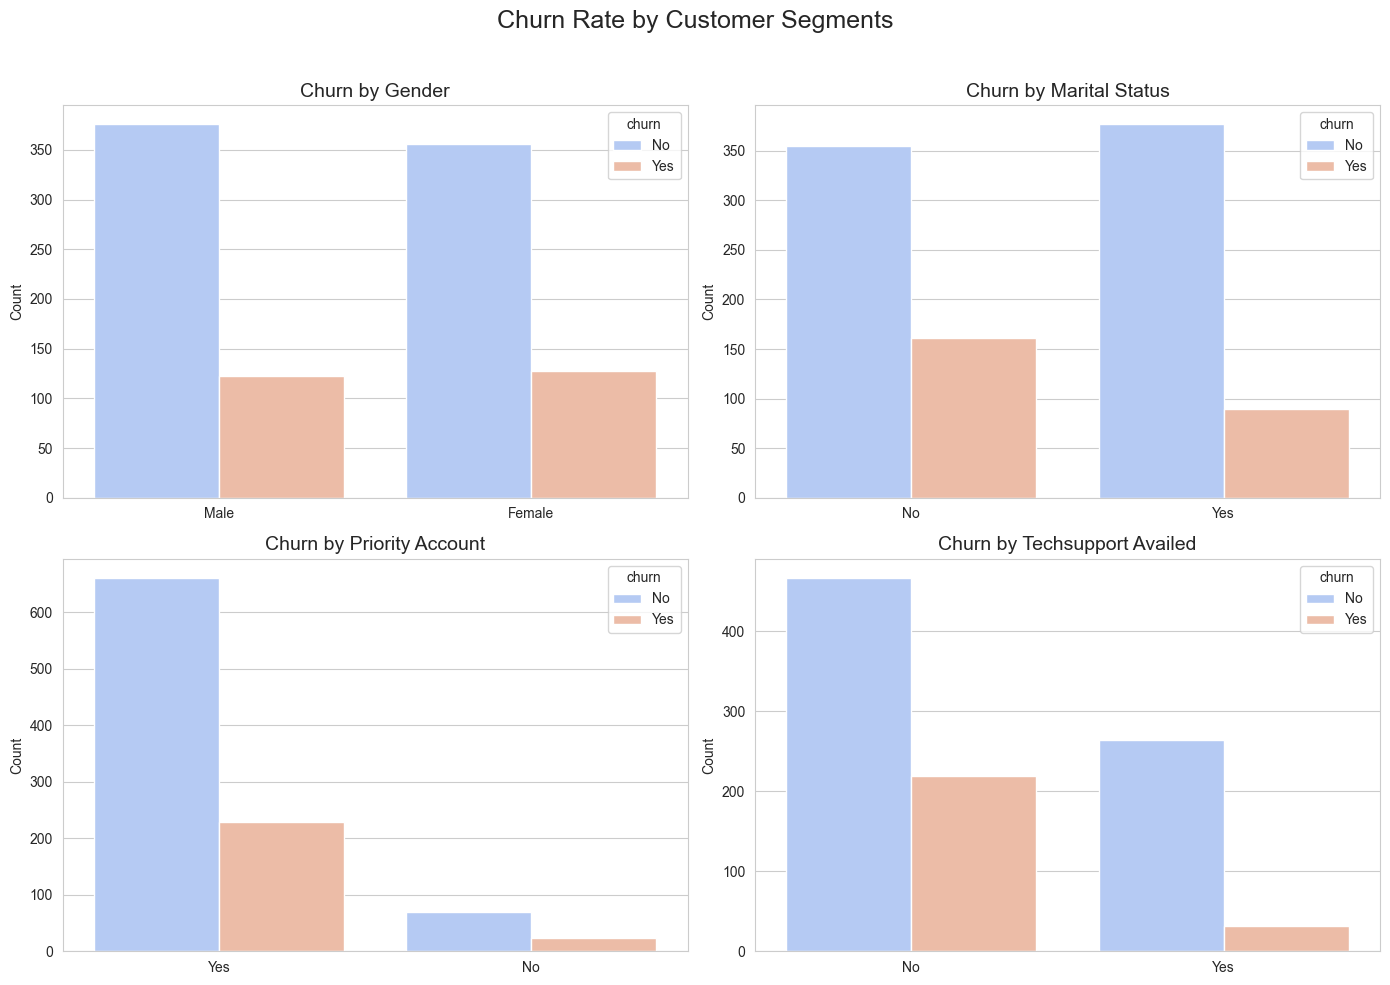

In [11]:
# List of key categorical features to analyze against churn
categorical_features = ['gender', 'marital_status', 'priority_account', 'techsupport_availed']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Churn Rate by Customer Segments', fontsize=18)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the features and create a count plot for each
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='churn', data=df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Churn by {feature.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\kulad\AppData\Local\Temp\ipykernel_14308\4229638827.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df, ax=axes[i], palette='pastel')
C:\Users\kulad\AppData\Local\Temp\ipykernel_14308\4229638827.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df, ax=axes[i], palette='pastel')


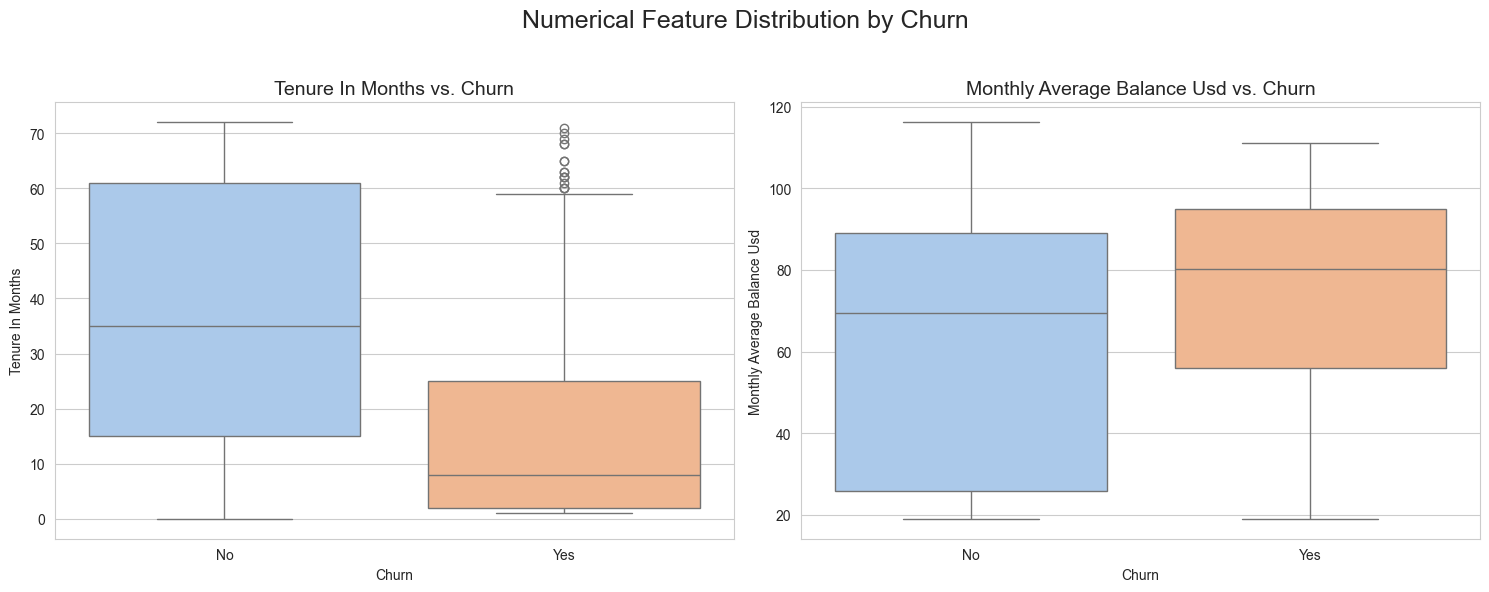

In [12]:
# List of key numerical features
numerical_features = ['tenure_in_months', 'monthly_average_balance_usd']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Numerical Feature Distribution by Churn', fontsize=18)

# Loop through the numerical features and create box plots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='churn', y=feature, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs. Churn', fontsize=14)
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature.replace("_", " ").title())

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [13]:
# Create a copy of the dataframe
df_clean = df.copy()

# Drop unnecessary columns
df_clean = df_clean.drop(columns=['recommendation', 'customerid'])

# Correct data types
df_clean['yearly_average_balance_usd'] = pd.to_numeric(df_clean['yearly_average_balance_usd'], errors='coerce')

# Consolidate categories
category_mapping = {
    'Credit Cards': 'Credit Card', 'Debit Cards': 'Debit Card',
    'Savings': 'Savings Account', 'Mobile': 'Mobile Banking'
}
df_clean['category'] = df_clean['category'].replace(category_mapping)

# --- Handling Missing Values (Revised Syntax) ---

# Fill numerical columns with the median
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)

# Fill object/categorical columns with the mode
for col in ['dependents', 'priority_account', 'credit_cards', 'loan_account', 'netbanking',
            'techsupport_availed', 'zero_balance_account', 'fds', 'paperless_banking', 'category', 'churn']:
    mode_val = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(mode_val)

# Fill feedback column with a placeholder
df_clean['customer_feedback'] = df_clean['customer_feedback'].fillna('No Feedback')

print("--- Verification ---")
df_clean.info()

# Verify that all missing values have been handled
print("Missing values after cleaning:")
print(df_clean.isnull().sum())

# Display the info to confirm data types are corrected
print("\nDataFrame Information after cleaning:")
df_clean.info()

print("\nConsolidated 'category' value counts:")
print(df_clean['category'].value_counts())

--- Verification ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       999 non-null    object 
 1   senior_citizen               1060 non-null   float64
 2   marital_status               999 non-null    object 
 3   dependents                   1060 non-null   object 
 4   tenure_in_months             1060 non-null   float64
 5   priority_account             1060 non-null   object 
 6   credit_cards                 1060 non-null   object 
 7   loan_account                 1060 non-null   object 
 8   netbanking                   1060 non-null   object 
 9   debit_card                   999 non-null    object 
 10  mobileapp                    999 non-null    object 
 11  techsupport_availed          1060 non-null   object 
 12  zero_balance_account         1060 non-null   object 
 1

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import numpy as np

# --- 1. Define Features (X) and Target (y) ---
X = df_clean.drop(columns=['churn', 'customer_feedback'])
y = df_clean['churn']

# --- 2. Encode the Target Variable ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# --- 3. Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# --- 4. Manual Preprocessing ---

# Identify column types from the training data
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Initialize the transformers
scaler = StandardScaler()
onehot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False) # sparse_output=False is important here

# --- Process Training Data ---
# Fit and transform the numerical features
X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])

# Fit and transform the categorical features
X_train_cat_encoded = onehot_encoder.fit_transform(X_train[categorical_features])

# --- Process Test Data ---
# IMPORTANT: Use .transform() only on the test data to avoid data leakage
X_test_num_scaled = scaler.transform(X_test[numerical_features])
X_test_cat_encoded = onehot_encoder.transform(X_test[categorical_features])


# --- 5. Combine Processed Features ---
# Concatenate the scaled numerical and encoded categorical features
X_train_processed = np.hstack((X_train_num_scaled, X_train_cat_encoded))
X_test_processed = np.hstack((X_test_num_scaled, X_test_cat_encoded))


# --- 6. Verification ---
print("Manual preprocessing complete.")
print(f"Shape of processed training features (X_train_processed): {X_train_processed.shape}")
print(f"Shape of processed testing features (X_test_processed): {X_test_processed.shape}")
print(f"Shape of training target (y_train): {y_train.shape}")
print(f"Shape of testing target (y_test): {y_test.shape}")
print("\nWe are now ready to build and evaluate our models!")

Manual preprocessing complete.
Shape of processed training features (X_train_processed): (848, 36)
Shape of processed testing features (X_test_processed): (212, 36)
Shape of training target (y_train): (848,)
Shape of testing target (y_test): (212,)

We are now ready to build and evaluate our models!


Training the Logistic Regression model...
Training complete.

--- Logistic Regression Evaluation ---
Accuracy: 0.7453
ROC AUC Score: 0.8748

Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.93      0.72      0.81       162
   Churn (1)       0.48      0.82      0.60        50

    accuracy                           0.75       212
   macro avg       0.70      0.77      0.71       212
weighted avg       0.82      0.75      0.76       212


Confusion Matrix:


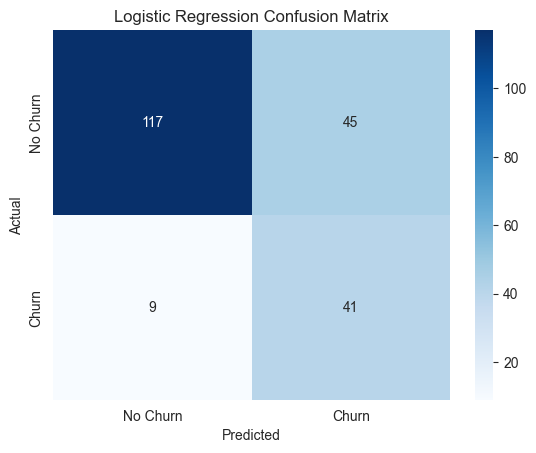

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# --- 1. Initialize and Train the Model ---
# We use class_weight='balanced' to help the model handle the imbalanced dataset.
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

print("Training the Logistic Regression model...")
log_reg.fit(X_train_processed, y_train)
print("Training complete.")

# --- 2. Make Predictions on the Test Set ---
y_pred_lr = log_reg.predict(X_test_processed)
y_pred_proba_lr = log_reg.predict_proba(X_test_processed)[:, 1] # Probabilities for the 'Yes' class

# --- 3. Evaluate the Model ---
print("\n--- Logistic Regression Evaluation ---")
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
# ROC AUC Score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn (0)', 'Churn (1)']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Training the XGBoost model...


C:\Users\kulad\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:03:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training complete.

--- XGBoost Classifier Evaluation ---
Accuracy: 0.8019
ROC AUC Score: 0.8512

Classification Report:
              precision    recall  f1-score   support

No Churn (0)       0.88      0.85      0.87       162
   Churn (1)       0.57      0.64      0.60        50

    accuracy                           0.80       212
   macro avg       0.73      0.75      0.74       212
weighted avg       0.81      0.80      0.81       212


Confusion Matrix:


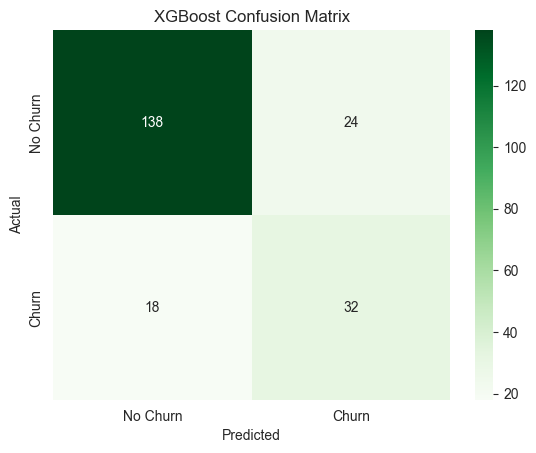

In [16]:
import xgboost as xgb

# --- 1. Initialize and Train the Model ---
# We can also provide a scale_pos_weight for handling imbalance in XGBoost.
# It's calculated as: count(negative class) / count(positive class)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)

print("\nTraining the XGBoost model...")
xgb_clf.fit(X_train_processed, y_train)
print("Training complete.")

# --- 2. Make Predictions on the Test Set ---
y_pred_xgb = xgb_clf.predict(X_test_processed)
y_pred_proba_xgb = xgb_clf.predict_proba(X_test_processed)[:, 1]

# --- 3. Evaluate the Model ---
print("\n--- XGBoost Classifier Evaluation ---")
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
# ROC AUC Score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Churn (0)', 'Churn (1)']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('XGBoost Confusion Matrix')
plt.show()

C:\Users\kulad\AppData\Local\Temp\ipykernel_14308\638438879.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')


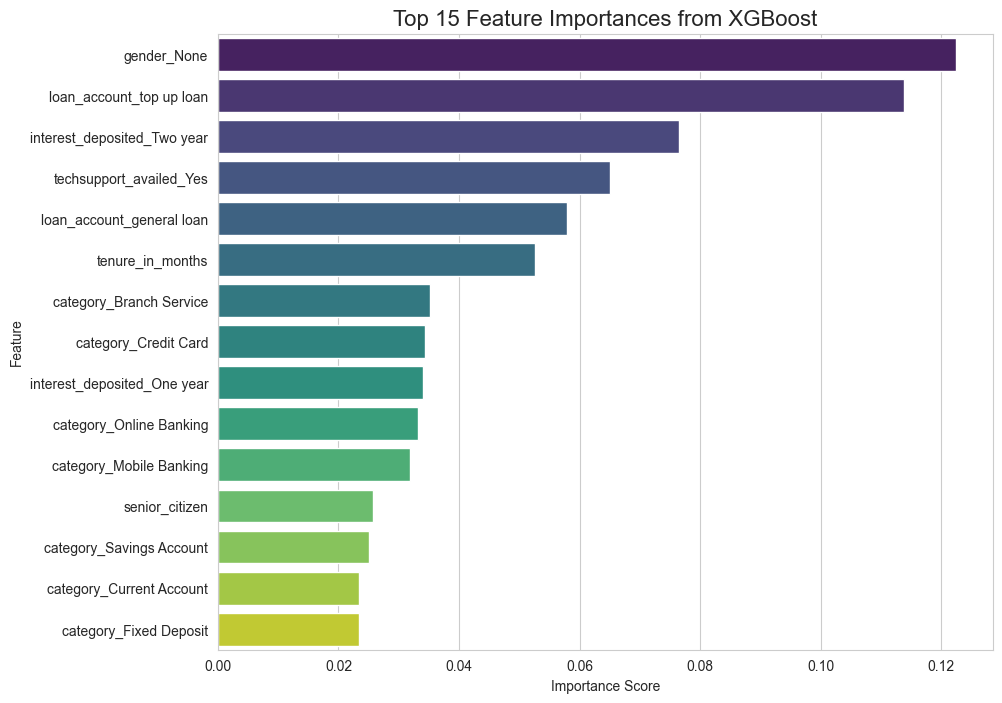

In [17]:
# --- Get Feature Names ---
# We use the 'onehot_encoder' variable that we explicitly fitted during manual preprocessing.
encoded_cat_features = onehot_encoder.get_feature_names_out(categorical_features)

# Combine the numerical feature names and the newly encoded categorical feature names
all_feature_names = np.concatenate([numerical_features, encoded_cat_features])

# --- Create and Plot the Importance DataFrame ---
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': xgb_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances from XGBoost', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [19]:

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
import torch

# --- Verification Step ---
print(f"\nPyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    device = 0
else:
    print("GPU not found, falling back to CPU.")
    device = -1

# --- Use a different, more standard model that has a .safetensors file ---
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
print(f"\nManually loading safe model and tokenizer for '{model_name}'...")

# 1. Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 2. Load the model. This will now succeed by using the safe file format.
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# 3. Create the pipeline with our pre-loaded components
print("Creating pipeline with pre-loaded components...")
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=device
)
print("Pipeline created successfully on the correct device.")

# --- Run the rest of the analysis ---
feedback_df = df_clean[['customer_feedback', 'category']].copy()
feedback_df['clean_feedback'] = feedback_df['customer_feedback'].str.lower().str.strip()

# Apply the sentiment analysis pipeline
# Note: The output labels for this model will be 'POSITIVE' and 'NEGATIVE'
all_sentiments = sentiment_pipeline(feedback_df['clean_feedback'].tolist())
feedback_df['sentiment'] = [s['label'] for s in all_sentiments]

print("\nSentiment analysis complete for the entire dataset.")
display(feedback_df.head())


PyTorch Version: 2.5.1+cu121
CUDA Available: True
GPU: NVIDIA GeForce RTX 3070 Ti Laptop GPU

Manually loading safe model and tokenizer for 'distilbert-base-uncased-finetuned-sst-2-english'...


Device set to use cuda:0


Creating pipeline with pre-loaded components...
Pipeline created successfully on the correct device.

Sentiment analysis complete for the entire dataset.


,customer_feedback,category,clean_feedback,sentiment
0,My Credit Card is not generating OTP.,Credit Card,my credit card is not generating otp.,NEGATIVE
1,The Current Account charges are too high.,Current Account,the current account charges are too high.,NEGATIVE
2,The loan prepayment charges are too high.,Loans,the loan prepayment charges are too high.,NEGATIVE
3,The Savings Account opening process was very s...,Savings Account,the savings account opening process was very s...,POSITIVE
4,The loan documentation process is very complic...,Loans,the loan documentation process is very complic...,NEGATIVE


C:\Users\kulad\AppData\Local\Temp\ipykernel_14308\3151433300.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=feedback_df, palette='viridis', order=['POSITIVE', 'NEGATIVE'])


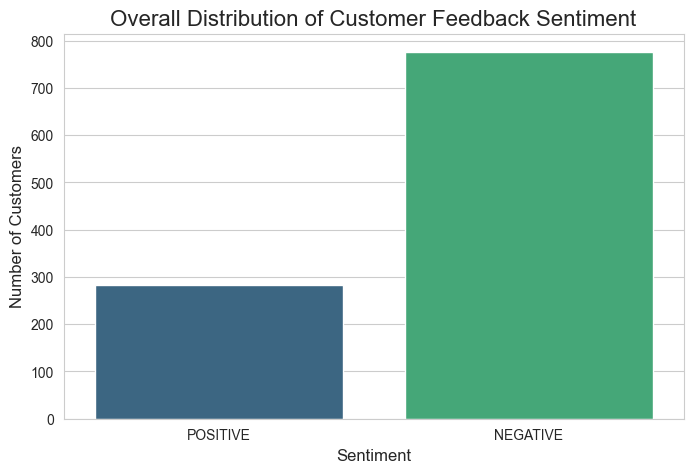

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a count plot for the new 'sentiment' column
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=feedback_df, palette='viridis', order=['POSITIVE', 'NEGATIVE'])

# Add a title and labels
plt.title('Overall Distribution of Customer Feedback Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

Sentiment Counts by Feedback Category:


sentiment,NEGATIVE,POSITIVE
category,,
Loans,248,33
Debit Card,112,18
Savings Account,83,40
Current Account,62,47
Branch Service,61,3
Credit Card,61,52
Mobile Banking,57,2
ATM Service,47,9
General,33,21


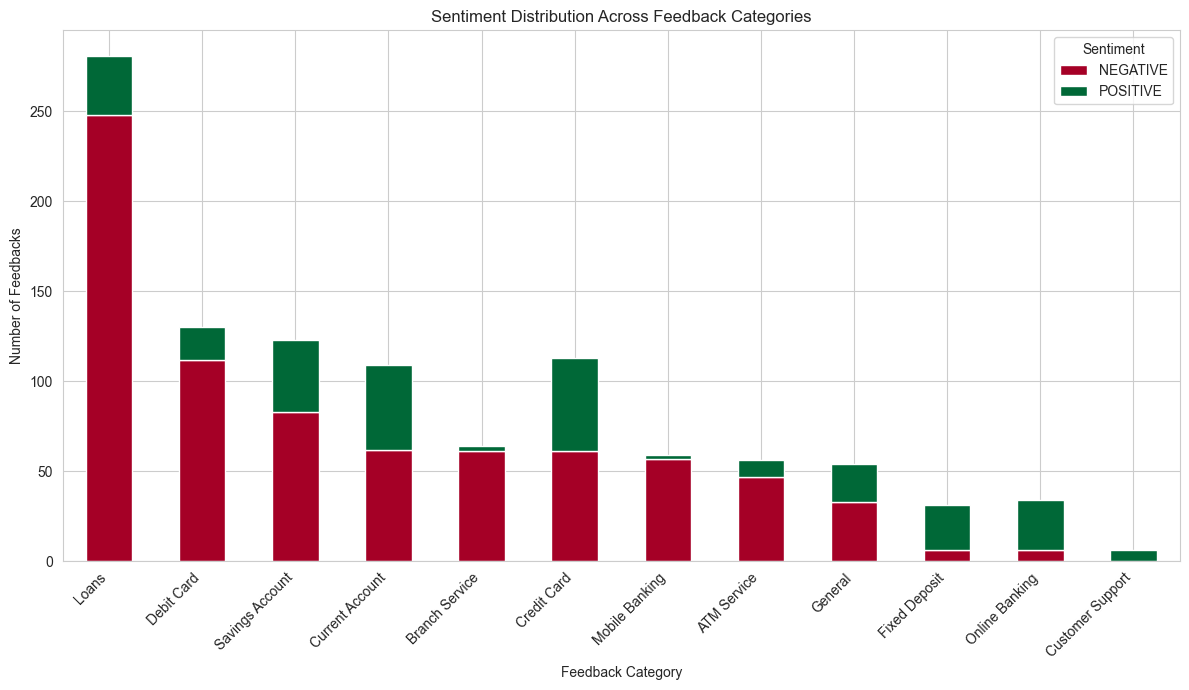

In [21]:
# Create a crosstab to see sentiment counts per category
sentiment_by_category = pd.crosstab(feedback_df['category'], feedback_df['sentiment'])

# We are most interested in the 'NEGATIVE' feedback, so we sort by it
if 'NEGATIVE' in sentiment_by_category.columns:
    sentiment_by_category = sentiment_by_category.sort_values(by='NEGATIVE', ascending=False)

print("Sentiment Counts by Feedback Category:")
display(sentiment_by_category)

# Create a stacked bar plot to visualize this
sentiment_by_category.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='RdYlGn',
    title='Sentiment Distribution Across Feedback Categories'
)
plt.ylabel('Number of Feedbacks')
plt.xlabel('Feedback Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [33]:
retention_dataset = [
    # --- LOANS (High Negative Feedback Area) ---
    {
        "input_text": "generate retention strategy: churn_risk=92%, category=Loans, sentiment=NEGATIVE, feedback='The loan approval process is too slow and cumbersome.', tenure=3",
        "target_text": "Primary Action: Immediately escalate the customer's loan application to a senior officer for expedited review (within 24 hours). Waive 50% of the processing fee. Communication Plan: 'We sincerely apologize for the delay in your loan application. Your case has been escalated for immediate review. As a token of our apology for the inconvenience, we have applied a 50% discount to your processing fee.'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=85%, category=Loans, sentiment=NEGATIVE, feedback='The loan interest rates are not competitive.', tenure=2",
        "target_text": "Primary Action: Proactively review the customer's profile for eligibility for a 0.25% interest rate reduction. Offer a free consultation with a financial advisor to discuss loan restructuring options. Communication Plan: 'Thank you for your feedback. We reviewed your account and may be able to offer you a more competitive interest rate. We would like to schedule a free consultation with a financial advisor to discuss your options.'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=88%, category=Loans, sentiment=NEGATIVE, feedback='The loan documentation process is very complicated.', tenure=1",
        "target_text": "Primary Action: Assign a dedicated loan officer to personally guide the customer through the remaining documentation, step-by-step. Provide a simplified checklist of required documents. Communication Plan: 'We understand the documentation process can be complex and we apologize for the difficulty. We have assigned a dedicated loan officer, [Officer Name], to assist you personally and ensure a smoother process going forward.'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=12%, category=Loans, sentiment=POSITIVE, feedback='The loan officers are very knowledgeable and helpful.', tenure=25",
        "target_text": "Primary Action: Send a formal letter of commendation to the mentioned loan officer's manager. Add 200 bonus reward points to the customer's account as a thank you. Communication Plan: 'Thank you so much for your kind words about our loan officers! We're thrilled you had a positive experience. As a token of our appreciation for your feedback and loyalty, we've added 200 bonus reward points to your account.'"
    },

    # --- DEBIT CARD (High Negative Feedback Area) ---
    {
        "input_text": "generate retention strategy: churn_risk=75%, category=Debit Card, sentiment=NEGATIVE, feedback='The Debit Card PIN reset process is very confusing.', tenure=1",
        "target_text": "Primary Action: Immediately email the customer a simplified, step-by-step guide with screenshots for resetting their PIN online. Enable a one-time option for them to reset it via a phone call. Communication Plan: 'We're sorry to hear you're having trouble with your PIN reset. We've just emailed you a simplified guide. If you prefer, you can also call us directly at [Number] for an immediate, one-time PIN reset over the phone.'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=68%, category=Debit Card, sentiment=NEGATIVE, feedback='My Debit Card was not delivered on time.', tenure=4",
        "target_text": "Primary Action: Immediately dispatch a new debit card via priority courier with tracking. Waive the card issuance fee and offer one month of free ATM withdrawals as compensation. Communication Plan: 'We apologize that your debit card delivery was delayed. A new card has been dispatched via priority courier and you can expect it within 2 business days. We have waived the issuance fee and all ATM charges for the next month.'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=20%, category=Debit Card, sentiment=POSITIVE, feedback='The replacement process for lost Debit Cards is very efficient.', tenure=45",
        "target_text": "Primary Action: No immediate action required, but flag the customer's profile with this positive interaction note for future reference. Communication Plan: 'Thank you for sharing your positive experience with our card replacement service! We're glad we could assist you quickly. We appreciate you being a long-standing customer.'"
    },

    # --- SAVINGS & CURRENT ACCOUNTS ---
    {
        "input_text": "generate retention strategy: churn_risk=90%, category=Savings Account, sentiment=NEGATIVE, feedback='The Savings Account minimum balance requirement is too high.', tenure=1",
        "target_text": "Primary Action: Proactively offer to switch the customer to a zero-balance savings account for the first 6 months. Provide information on alternative account types that better suit their needs. Communication Plan: 'We understand your concern about the minimum balance requirement. We'd like to offer you a switch to our zero-balance account for the next six months to help you get started. We have other account options that might be a better fit as well.'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=70%, category=Current Account, sentiment=NEGATIVE, feedback='The Current Account charges are too high.', tenure=72",
        "target_text": "Primary Action: Review the customer's account history for potential fee waivers or a downgrade to a more suitable, lower-cost account tier based on their transaction volume. Communication Plan: 'As a loyal customer of 6 years, your feedback is very important. We are reviewing your account to see if we can waive some recent fees or move you to a more cost-effective account type. We will contact you with options shortly.'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=15%, category=Savings Account, sentiment=POSITIVE, feedback='The Savings Account opening process was very smooth and quick.', tenure=9",
        "target_text": "Primary Action: Send a thank you email and add a note to their profile. No financial incentive needed. Communication Plan: 'We are so happy to hear you had a great experience opening your savings account with us. We strive to make our services as smooth as possible. Thank you for choosing XYZ Bank!'"
    },

    # --- BRANCH & ATM SERVICE ---
    {
        "input_text": "generate retention strategy: churn_risk=80%, category=Branch Service, sentiment=NEGATIVE, feedback='The branch is always very crowded.', tenure=5",
        "target_text": "Primary Action: Apologize for the experience and inform the customer about our mobile app's appointment booking feature to skip the queue. Forward this feedback to the branch manager for operational review. Communication Plan: 'We apologize for the long wait times at our branch. To make your next visit smoother, you can pre-book an appointment through our mobile app. We have also shared your feedback with the branch manager to improve our service.'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=65%, category=ATM Service, sentiment=NEGATIVE, feedback='The ATM is often out of service.', tenure=3",
        "target_text": "Primary Action: Log an urgent ticket for the specified ATM's maintenance and location. Inform the customer of nearby, alternative ATMs. Communication Plan: 'We are very sorry for the inconvenience with the ATM. We have logged an urgent request for its maintenance. In the meantime, our ATMs at [Location A] and [Location B] are fully operational.'"
    },
    
    # --- POSITIVE FEEDBACK (CREDIT CARD & ONLINE BANKING) ---
    {
        "input_text": "generate retention strategy: churn_risk=10%, category=Credit Card, sentiment=POSITIVE, feedback='The Credit Card rewards program is excellent.', tenure=34",
        "target_text": "Primary Action: Send a personalized thank you note. Consider offering a small, temporary boost on their rewards earning rate for one week. Communication Plan: 'We're delighted you're enjoying our rewards program! To say thank you, we're giving you a 1.5x rewards boost on all purchases for the next 7 days. Happy spending!'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=5%, category=Online Banking, sentiment=POSITIVE, feedback='The online banking interface is very user-friendly.', tenure=63",
        "target_text": "Primary Action: No action needed, but add a positive flag to the customer's CRM profile. Communication Plan: 'Thank you for your wonderful feedback about our online banking platform! We're so glad you find it easy to use. We appreciate you being a customer with us for over 5 years.'"
    },
    
    # --- QUERIES (Handled as neutral sentiment by the model) ---
    {
        "input_text": "generate retention strategy: churn_risk=30%, category=Loans, sentiment=NEUTRAL, feedback='What documents are needed for loan application?', tenure=25",
        "target_text": "Primary Action: Provide a clear, concise checklist of all required documents for a standard loan application. Include a link to the online application portal. Communication Plan: 'That's a great question! For a standard loan, you will typically need [Doc 1], [Doc 2], and [Doc 3]. You can find a full checklist and start your application at this link: [URL]. Let us know if you need more details!'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=40%, category=General, sentiment=NEUTRAL, feedback='Can I set up automatic bill payments from my account?', tenure=61",
        "target_text": "Primary Action: Respond with a simple 'Yes' and provide a step-by-step guide or a link to a tutorial on how to set up auto-pay through the mobile app or online banking. Communication Plan: 'Yes, you certainly can! Setting up automatic bill payments is a great way to manage your finances. You can do this in the 'Bill Pay' section of our mobile app or by logging into your online banking portal. Here is a quick guide to help you: [Link].'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=35%, category=Savings Account, sentiment=NEUTRAL, feedback='How do I check my Savings Account balance online?', tenure=30",
        "target_text": "Primary Action: Provide clear instructions for checking the balance online. Communication Plan: 'You can check your Savings Account balance anytime by logging into our mobile app or our online banking website at [URL]. Your balance will be displayed on the main dashboard right after you log in.'"
    },
    
    # --- HIGH RISK BUT UNCLEAR FEEDBACK ---
    {
        "input_text": "generate retention strategy: churn_risk=95%, category=Credit Card, sentiment=NEGATIVE, feedback='I am facing an issue with my Credit Card.', tenure=1",
        "target_text": "Primary Action: Immediately flag the account for proactive outreach. Have a senior customer service agent call the customer within the hour to understand and resolve the specific issue. Communication Plan: 'We're very sorry to hear you're facing an issue with your Credit Card. A member of our senior support team will be calling you shortly to personally assist you and resolve this matter. Your satisfaction is our priority.'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=82%, category=General, sentiment=NEGATIVE, feedback='The bank's security measures are not up to the mark.', tenure=35",
        "target_text": "Primary Action: Escalate this feedback to the security and compliance team for review. Have a customer relations manager contact the customer to understand their specific concerns. Communication Plan: 'Thank you for raising this important concern. We take security very seriously. A customer relations manager will be in touch with you to understand your feedback in more detail so we can address any potential issues.'"
    },
    {
        "input_text": "generate retention strategy: churn_risk=77%, category=Mobile Banking, sentiment=NEGATIVE, feedback='The mobile app has frequent downtime.', tenure=69",
        "target_text": "Primary Action: Acknowledge the issue and inform the customer that the feedback has been passed to the technical team. Offer a small service credit for the inconvenience. Communication Plan: 'We apologize for the recent instability with our mobile app. Your feedback is crucial and has been shared with our technical team to improve performance. We have credited your account with [small amount] for the trouble.'"
    },
    {
    "input_text": "generate retention strategy: churn_risk=60%, category=General Inquiry, sentiment=NEUTRAL, feedback='it is broken and not working'",
    "target_text": "I'm sorry to hear something isn't working correctly. To help you better, could you please tell me what is broken? For example, is it your debit card, the mobile app, or our website?"
    }
]

# You can now convert this list of dictionaries into a pandas DataFrame and then a Hugging Face Dataset
import pandas as pd
from datasets import Dataset

fine_tuning_df = pd.DataFrame(retention_dataset)

# Display the first few rows to verify
print("Generated DataFrame for Fine-Tuning:")
display(fine_tuning_df.head())

# This can now be used to create your Hugging Face Dataset
# hg_dataset = Dataset.from_pandas(fine_tuning_df)

Generated DataFrame for Fine-Tuning:


,input_text,target_text
0,"generate retention strategy: churn_risk=92%, c...",Primary Action: Immediately escalate the custo...
1,"generate retention strategy: churn_risk=85%, c...",Primary Action: Proactively review the custome...
2,"generate retention strategy: churn_risk=88%, c...",Primary Action: Assign a dedicated loan office...
3,"generate retention strategy: churn_risk=12%, c...",Primary Action: Send a formal letter of commen...
4,"generate retention strategy: churn_risk=75%, c...",Primary Action: Immediately email the customer...


In [40]:
# Install necessary libraries if you haven't already
# !pip install transformers datasets accelerate -U

import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, TrainingArguments, Trainer

# --- 1. Create and Load your hand-crafted dataset (retention_dataset.csv) ---
# Aim for 20-50 high-quality examples for better results.
# Each row should have 'input_text' and 'target_text'.
#
# EXAMPLE of a row in your CSV:
# input_text: "generate retention strategy: churn_risk=95%, category=Loans, sentiment=NEGATIVE, feedback='The loan disbursement process is very slow.', tenure=1"
# target_text: "Primary Action: Escalate loan application to a senior officer for 24-hour approval and waive one processing fee. Communication Plan: 'We sincerely apologize for the delay. Your case has been escalated for immediate review. As an apology, we've waived a processing fee. We value your business.' "

# try:
#     fine_tuning_df = pd.read_csv('retention_dataset.csv')
# except FileNotFoundError:
#     print("Error: 'retention_dataset.csv' not found. Creating a dummy dataset.")
#     dummy_data = {
#         "input_text": ["generate retention strategy: churn_risk=85%, category=Loans, sentiment=NEGATIVE, feedback='The loan approval process is too slow.', tenure=2"],
#         "target_text": ["Primary Action: Escalate for 24hr approval & waive fee. Communication Plan: 'We apologize for the delay and have escalated your case.'"]
#     }
#     fine_tuning_df = pd.DataFrame(dummy_data)

# hf_dataset = Dataset.from_pandas(fine_tuning_df)

# Convert the list of dictionaries directly into a pandas DataFrame
fine_tuning_df = pd.DataFrame(retention_dataset)

# Convert to a Hugging Face Dataset
hf_dataset = Dataset.from_pandas(fine_tuning_df)


# Split into training and validation sets
if len(hf_dataset) > 10:
    train_test_split = hf_dataset.train_test_split(test_size=0.2)
    train_dataset = train_test_split['train']
    eval_dataset = train_test_split['test']
else:
    train_dataset = hf_dataset # If dataset is too small, just use it for training
    eval_dataset = None


# --- 2. Load Tokenizer and Model ---
model_name = "google/flan-t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


# --- 3. Preprocess and Tokenize the Dataset ---
def preprocess_function(examples):
    inputs = [doc for doc in examples["input_text"]]
    targets = [doc for doc in examples["target_text"]]
    model_inputs = tokenizer(inputs, max_length=256, truncation=True, padding="max_length")
    
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train_dataset = train_dataset.map(preprocess_function, batched=True)
tokenized_eval_dataset = eval_dataset.map(preprocess_function, batched=True) if eval_dataset else None


training_args = TrainingArguments(
    output_dir="./retention_strategy_model_trainer",
    num_train_epochs=20,
    per_device_train_batch_size=4,
    learning_rate=3e-4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    
    # --- FIX IS HERE ---
    # Rename 'evaluation_strategy' to 'eval_strategy'
    eval_strategy="epoch" if eval_dataset else "no", 
    
    # It's good practice to ensure the save strategy matches
    save_strategy="epoch" if eval_dataset else "no", 
    
    load_best_model_at_end=True if eval_dataset else False,
    report_to="none"
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_eval_dataset,
    tokenizer=tokenizer,
)

print("\nStarting the fine-tuning process for the RETENTION STRATEGY model...")
trainer.train()
print("Fine-tuning complete!")


# --- 5. Save the Best Model ---
final_model_path = "./final_retention_strategy_model"
trainer.save_model(final_model_path)
print(f"Fine-tuned model saved to {final_model_path}")

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

C:\Users\kulad\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:3951: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

C:\Users\kulad\AppData\Local\Temp\ipykernel_14308\4137244256.py:88: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



Starting the fine-tuning process for the RETENTION STRATEGY model...


Epoch,Training Loss,Validation Loss
1,No log,11.999072
2,No log,6.682211
3,10.351000,4.812276
4,10.351000,4.144433
5,4.386600,3.682825
6,4.386600,3.457713
7,4.386600,3.277456
8,3.366900,3.099759
9,3.366900,2.931828
10,2.727500,2.798396


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


Fine-tuning complete!
Fine-tuned model saved to ./final_retention_strategy_model


In [41]:
from transformers import pipeline

# --- Load your fine-tuned model and tokenizer ---
# **FIX:** Use the correct path where you saved the model
model_path = "./final_retention_strategy_model" 

# It's good practice to also ensure the tokenizer is loaded from the same path
# Although pipeline often handles this, being explicit is safer.
tokenizer_path = "./final_retention_strategy_model"

retention_generator = pipeline("text2text-generation", model=model_path, tokenizer=tokenizer_path)

# --- Create an input for a new customer ---
# Let's use the data for customer '6467-CHFZW' who churned
new_customer_feedback = "The loan interest rates are too high."
new_customer_category = "Loans"
# Let's assume your churn model gave this customer a high risk score
new_customer_churn_risk = 0.92
new_customer_sentiment = "NEGATIVE"
new_customer_tenure = 24 # Let's add tenure for more context

# Format the input text exactly as you did for the training data
# Using the more detailed prompt from our fine-tuning dataset
input_prompt = (
    f"generate retention strategy: churn_risk={new_customer_churn_risk:.0%}, "
    f"category={new_customer_category}, sentiment={new_customer_sentiment}, "
    f"feedback='{new_customer_feedback}', tenure={new_customer_tenure}"
)


# --- Generate the retention strategy ---
generated_strategy = retention_generator(input_prompt, max_length=150)

print("--- Generated Retention Strategy ---")
print(f"Input: {input_prompt}")
print("\n")
print(f"Output: {generated_strategy[0]['generated_text']}")

Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


--- Generated Retention Strategy ---
Input: generate retention strategy: churn_risk=92%, category=Loans, sentiment=NEGATIVE, feedback='The loan interest rates are too high.', tenure=24


Output: Primary Action: Respond to the customer's feedback about the loan interest rate. Communication Plan: 'We are very sorry to hear that you have received a customer's feedback about the loan interest rate. We are very sorry to hear that you have received a customer's feedback about the loan interest rate. We are very sorry to hear that you have received a customer's feedback about the loan interest rate. We are very sorry to hear that you have received a customer's feedback about the loan interest rate. We are very sorry to hear that you have received a customer's feedback about the loan interest rate. We are very sorry to hear that you have received a customer's feedback about the loan interest rate. We are very sorry to hear that you have received a customer's feedback about the loan interest ra

In [42]:
# Install Gradio if you haven't already
# !pip install -q gradio

import gradio as gr
from transformers import pipeline
import re # We'll use regex for simple keyword matching

# --- 1. Load YOUR Fine-Tuned Model ---
# This is the model you trained in the previous steps.
model_path = "./final_retention_strategy_model"
print(f"Loading your fine-tuned model from: {model_path}")
try:
    chatbot_generator = pipeline("text2text-generation", model=model_path, tokenizer=model_path)
    print("Your fine-tuned model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    # Provide a fallback so the app can still launch with an error message
    chatbot_generator = None

# --- 2. Define the Chatbot Logic Function ---
# This function now uses your model to generate responses.

# Define keywords for each category to help with clarification
category_keywords = {
    'Debit Card': ['debit', 'card', 'atm', 'pin', 'transaction'],
    'Credit Card': ['credit', 'card', 'bill', 'statement', 'rewards', 'limit'],
    'Loans': ['loan', 'emi', 'prepayment', 'application', 'disbursement'],
    'Account': ['account', 'savings', 'current', 'balance', 'statement', 'passbook'],
    'Branch Service': ['branch', 'staff', 'crowd'],
    'Mobile Banking': ['app', 'mobile', 'login', 'crash'],
    'Online Banking': ['online', 'website', 'netbanking']
}

def has_keywords(query):
    """Check if the query contains any of our known keywords."""
    for category, keywords in category_keywords.items():
        if any(re.search(r'\b' + keyword + r'\b', query, re.IGNORECASE) for keyword in keywords):
            return True
    return False

def get_fine_tuned_chatbot_response(user_query):
    """
    Generates a response using the fine-tuned T5 model.
    Includes a method for asking clarifying questions.
    """
    if chatbot_generator is None:
        return "Error: The fine-tuned model could not be loaded. Please check the path and model files."
    
    # --- Step 1: Handle unclear or short queries ---
    if not user_query or len(user_query.strip()) < 10 or not has_keywords(user_query):
        return (
            "I'm sorry, I'm not quite sure how to help. "
            "Could you please provide more details about your issue? "
            "For example, you could mention 'loan application' or 'debit card problem'."
        )

    # --- Step 2: Craft the prompt for your T5 model ---
    # We create an instruction that tells the model to act as a chatbot.
    # We don't need churn risk here, just the user's direct query.
    input_prompt = (
        f"instruction: Act as a helpful and empathetic bank chatbot. "
        f"A customer has the following query: '{user_query}'. "
        f"Analyze the query and provide a direct, helpful response, and if applicable, "
        f"state which team it will be routed to."
    )
    
    # --- Step 3: Generate the response using your model ---
    try:
        generated_response = chatbot_generator(input_prompt, max_length=100)
        response_text = generated_response[0]['generated_text']
    except Exception as e:
        response_text = f"There was an error generating a response: {e}"

    return response_text


# --- 3. Create the Gradio Interface ---
iface_fine_tuned = gr.Interface(
    fn=get_fine_tuned_chatbot_response,
    inputs=gr.Textbox(lines=3, label="Your Question or Feedback", placeholder="e.g., 'My debit card is not working at the ATM...'"),
    outputs=gr.Textbox(label="Fine-Tuned Chatbot Response"),
    title="XYZ Bank Support Chatbot (Powered by Our Fine-Tuned Model)",
    description="This chatbot uses our custom fine-tuned model to understand your query and provide a helpful response.",
    allow_flagging="never",
    theme="default",
    examples=[
        ["My Debit Card often gets blocked without reason."],
        ["The loan approval process is too slow and cumbersome."],
        ["The ATM is often out of service."],
        ["help"] # This should trigger the clarification question
    ]
)

# --- 4. Launch the App ---
print("\nLaunching the Gradio chatbot interface powered by YOUR fine-tuned model...")
iface_fine_tuned.launch(share=True)

Loading your fine-tuned model from: ./final_retention_strategy_model


Device set to use cuda:0


Your fine-tuned model loaded successfully.


C:\Users\kulad\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\interface.py:425: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(



Launching the Gradio chatbot interface powered by YOUR fine-tuned model...
* Running on local URL:  http://127.0.0.1:7871

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [47]:

from transformers import pipeline
import numpy as np

# --- Load all your trained components ---
retention_generator = pipeline("text2text-generation", model="./final_retention_strategy_model")

def generate_end_to_end_retention_plan(customer_id, feedback_text, customer_df, xgb_model, scaler, encoder, numerical_cols, categorical_cols):
    """
    Simulates the full, end-to-end system for a single customer.
    Uses a consistent prompt and improved generation parameters.
    """
    print(f"--- Generating plan for Customer ID: {customer_id} ---")
    
    # --- 1. NLP Analysis (Simulated for this function) ---
    sentiment = "NEGATIVE"
    # A real implementation would classify this, but we'll hardcode for the example
    feedback_category = "Debit Card" 
    print(f"NLP Analysis: Sentiment='{sentiment}', Category='{feedback_category}'")

    # --- 2. Churn Prediction ---
    customer_index = df[df['customerid'] == customer_id].index
    if len(customer_index) == 0:
        return "Customer ID not found."
    customer_features = customer_df.iloc[customer_index]
    
    num_scaled = scaler.transform(customer_features[numerical_cols])
    cat_encoded = encoder.transform(customer_features[categorical_cols])
    processed_features = np.hstack((num_scaled, cat_encoded))
    
    churn_risk_score = xgb_model.predict_proba(processed_features)[0, 1]
    print(f"Churn Prediction: Risk Score = {churn_risk_score:.2%}")
    
    # --- 3. Generative AI ---
    tenure = customer_features['tenure_in_months'].iloc[0]
    
    # **FIX: Use the prompt format the model was trained on**
    input_prompt = (
        f"generate retention strategy: churn_risk={churn_risk_score:.0%}, "
        f"category={feedback_category}, sentiment={sentiment}, "
        f"feedback='{feedback_text}', tenure={int(tenure)}"
    )
    
    # **FIX: Use better generation parameters to avoid repetition**
    generated_output = retention_generator(
        input_prompt, 
        max_length=200,
        num_beams=4,
        no_repeat_ngram_size=2,
        early_stopping=True
    )
    generated_plan = generated_output[0]['generated_text']
    
    # --- 4. Final Output ---
    print("\n--- Generated Plan ---")
    print(generated_plan)
    
    return {
        "customer_id": customer_id,
        "churn_risk": churn_risk_score,
        "feedback_analysis": {"sentiment": sentiment, "category": feedback_category},
        "retention_plan": generated_plan
    }

# --- Example Usage ---
customer_id_to_test = '1066-JKSGK'
feedback_for_customer = 'The Debit Card delivery is very delayed.'

# Run the full pipeline with the corrected logic
full_plan = generate_end_to_end_retention_plan(
    customer_id_to_test, 
    feedback_for_customer, 
    df_clean,
    xgb_clf, 
    scaler, 
    onehot_encoder,
    numerical_features,
    categorical_features
)

Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=200) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


--- Generating plan for Customer ID: 1066-JKSGK ---
NLP Analysis: Sentiment='NEGATIVE', Category='Debit Card'
Churn Prediction: Risk Score = 89.19%

--- Generated Plan ---
Primary Action: Immediately notify the customer of the delay in the delivery of a debit card.


Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
